## Short Term Rental Listings

Using data from [Inside Airbnb](http://insideairbnb.com) we can model this data as a graph in Neo4j using this graph data model:

![](http://guides.neo4j.com/listings/file/img/datamodel_full.png)

If you haven't already, import the Listings graph by running `:play http://guides.neo4j.com/listings` in Neo4j Browser and running the import queries.

## Querying Neo4j from Python

![](http://py2neo.org/v3/_static/py2neo-2016.260x152.png)
We can use the [Py2neo library](http://py2neo.org/v3/database.html) for interacting with Neo4j using Python. Py2neo supports Cypher, the bolt protocol, and works nicely with many Python data science libraries.

In [47]:
# pip install py2neo
from py2neo import Graph

In [49]:
# create connection to Neo4j instance
graph = Graph()

In [14]:
result = graph.run("MATCH (a) RETURN COUNT(a)")
for r in result:
    print(r)

('COUNT(a)': 221419)


## Pandas

We can use the popular [pandas](http://pandas.pydata.org/) with Neo4j. To create a DataFrame object from data from Neo4j simply pass the result object of a Cypher query into the DataFrame constructor.

In [11]:
# pip install pandas
from pandas import DataFrame

In [104]:
DataFrame(graph.data("MATCH (n:Neighborhood)<-[:IN_NEIGHBORHOOD]-(l:Listing)-[:HAS]->(a:Amenity) RETURN n.name AS neighborhood, l.name AS name, COLLECT(a.name) AS amenities, l.price AS price LIMIT 25"))

,amenities,name,neighborhood,price
0,"[Fire Extinguisher, Carbon Monoxide Detector, ...",Cute One Bedroom Apartment in SoCo,None,100.0
1,"[TV, Kitchen, Free Parking on Premises, Heatin...",Private & quiet; walk to the party,None,650.0
2,"[Internet, Wireless Internet, TV, Cable TV, He...",East Side Hideaway Studio,None,75.0
3,"[Free Parking on Premises, Kitchen, Pool, Air ...",Awesome Space with Great Amenenties,Mueller,200.0
4,"[Essentials, Smoke Detector, Dryer, Washer, He...",1930's Vintage Bungalow off SoCo,None,173.0
5,"[Fire Extinguisher, Essentials, Washer, Smoke ...",Home away from home in South Austin,None,50.0
6,"[Heating, Pets Allowed, Free Parking on Premis...",Great Travis Heights location!,None,129.0
7,"[TV, Internet, Pets Allowed, Indoor Fireplace,...",Gorgeous home 8 min from downtown,Oak Hill,165.0
8,"[Washer, Smoke Detector, Essentials, Shampoo, ...","Private room,private bath + deer!",Northwest Hills,45.0
9,"[Family/Kid Friendly, Essentials, Shampoo, Cab...",St.Eds Secret Casita off S.Congress,None,59.0


In [62]:
# What are the most expensive neighborhoods?
avg_zips = DataFrame(graph.data('''
MATCH (l:Listing)-[:IN_NEIGHBORHOOD]->(n:Neighborhood)
WITH n, avg(l.price) AS avg_price
RETURN n.neighborhood_id AS zip, n.name AS neighborhood, avg_price ORDER BY avg_price DESC LIMIT 10
'''))

avg_zips

,avg_price,neighborhood,zip
0,391.473684,Steiner Ranch,78732
1,316.593939,Barton Hills,78746
2,299.970822,Tarrytown,78703
3,273.533333,None,78725
4,266.297720,St. Edwards,78704
5,265.039370,Govalle,78702
6,258.250000,None,78734
7,257.252427,Rosedale,78731
8,251.645833,Downtown,78701
9,240.000000,None,78735


## Plotting



In [58]:
%matplotlib inline

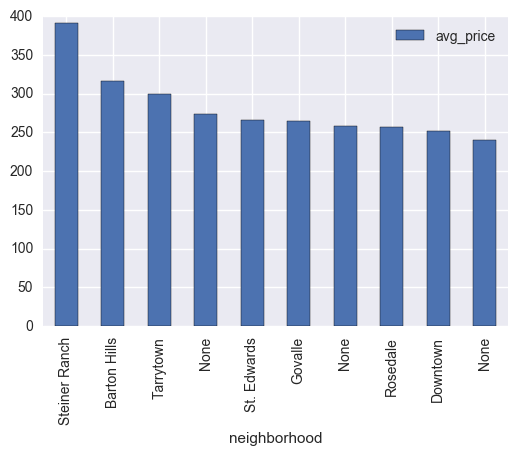

In [64]:
avg_zips.plot.bar(x="neighborhood")

## NLP

We have review text ("comments") for each review. We can apply NLP techniques such as keyword extraction and sentiment analysis to enhance our data model. We will use the [Textblob Python toolkit](https://textblob.readthedocs.io/en/dev/)

In [67]:
# pip install textblob
from textblob import TextBlob

In [65]:
# fetch one review
review = graph.run("MATCH (r:Review) RETURN r.comments LIMIT 1").evaluate()
review

'I had a great time staying here! The room is huge and sunny, and it was the perfect place to do some work and hang out in the afternoon before heading out to dinner. Alexandra and David were very welcoming hosts. They were always around to answer any questions. They had breakfast and coffee for me every morning and even left it on the table by the door on mornings when I had to rush out to the office.  The cats were really cute too!'

In [72]:
# instantiate TextBlob object
blob = TextBlob(review)

# sentiment analysis
print ("Sentiment: ")
print(blob.sentiment.polarity)
print()

# keyword extraction (using noun phrases)
print ("Keywords: ")
print(blob.noun_phrases)

Sentiment: 
0.5375000000000001

Keywords: 
['great time', 'perfect place', 'alexandra', 'david']



## Keyword extraction

We can extend the model to include keywords extracted from the reviews:

![](http://guides.neo4j.com/listings/img/datamodel_keyword.png)

In [74]:
graph.run("CREATE CONSTRAINT ON (k:Keyword) ASSERT k.name IS UNIQUE;").evaluate()

In [97]:
# extract keywords and write back to graph
reviews = graph.run("MATCH (r:Review)-[:REVIEWS]->(l:Listing) RETURN r.comments AS review, l.listing_id AS id LIMIT 100")
tx = graph.begin()
for r in reviews:
    blob = TextBlob(r.get("review"))
    keywords = blob.noun_phrases
    review_id = r.get("id")
    tx.run('''
        MATCH (l:Listing) WHERE l.listing_id = {listing_id}
        UNWIND {keywords} AS kw
        MERGE (k:Keyword {name: kw})
        MERGE (l)-[:CONTAINS]->(k)
    ''', parameters={"listing_id":review_id, "keywords":keywords})
tx.commit()

In [98]:
# What is the most common Keyword?
graph.run("MATCH (l:Listing)-[:CONTAINS]->(k:Keyword) RETURN k.name, COUNT(*) AS num ORDER BY num DESC LIMIT 25").dump()

 k.name             num 
------------------------
 austin             6   
 great experience   5   
 lovely home        4   
 thank              4   
 airbnb             4   
 perfect            3   
 highly             3   
 's place           3   
 great time         3   
 excellent          3   
 thanks             3   
 great host         3   
 private bathroom   2   
 cable tv           2   
 amazing place      2   
 wonderful hosts    2   
 late arrival       2   
 safe neighborhood  2   
 clean              2   
 friendly dog       2   
 communication      2   
 host               2   
 hosts              2   
 studio apartment   2   
 carol              2   


## Community Detection

Community detection (or clustering) can be used to enhance our data model, by identifying similar listings based on extracted keywords.
![](http://www.lyonwj.com/public/img/community-1.png)

In [86]:
# pip3 install python-igraph
from igraph import Graph as IGraph

Find all pairs of topics and find the number of common groups that share each pair of topics. We'll use this as weight to build a "virtual graph" of the form(Topic)-[:OCCURS_WITH {weight}]-(Topic)


In [99]:
query = """
MATCH (k:Keyword)<-[:CONTAINS]-(:Listing)-[:CONTAINS]->(other:Keyword)
WHERE ID(k) < ID(other)
RETURN k.name, other.name, COUNT(*) AS weight
ORDER BY weight DESC
LIMIT 25
"""

result = graph.run(query)
for row in result:
    print(row)

('k.name': 'austin', 'other.name': 'airbnb', 'weight': 4)
('k.name': 'austin', 'other.name': 'thank', 'weight': 4)
('k.name': 'austin', 'other.name': 'lovely home', 'weight': 4)
('k.name': 'thank', 'other.name': 'great experience', 'weight': 3)
('k.name': 'thank', 'other.name': 'airbnb', 'weight': 3)
('k.name': 'thank', 'other.name': 'lovely home', 'weight': 3)
('k.name': 'austin', 'other.name': 'great experience', 'weight': 3)
('k.name': 'lovely home', 'other.name': 'airbnb', 'weight': 3)
('k.name': 'thanks', 'other.name': 'great experience', 'weight': 3)
('k.name': 'excellent', 'other.name': 'highly', 'weight': 3)
('k.name': 'great experience', 'other.name': 'perfect', 'weight': 3)
('k.name': "'s place", 'other.name': 'clean', 'weight': 2)
('k.name': 'thank', 'other.name': 'great time', 'weight': 2)
('k.name': 'wonderful hosts', 'other.name': 'great experience', 'weight': 2)
('k.name': 'great experience', 'other.name': 'studio apartment', 'weight': 2)
('k.name': 'thanks', 'other.name

In [100]:
query = """
MATCH (k:Keyword)<-[:CONTAINS]-(:Listing)-[:CONTAINS]->(other:Keyword)
WHERE ID(k) < ID(other)
RETURN k.name, other.name, COUNT(*) AS weight
"""

ig = IGraph.TupleList(graph.run(query), weights=True)
ig

Now we'll run the Walktrap community detection algorithm to find clusters / communities:


In [101]:
clusters = IGraph.community_walktrap(ig, weights="weight")
clusters = clusters.as_clustering()
len(clusters)

10

In [102]:
nodes = [node["name"] for node in ig.vs]
nodes = [{"id": x, "label": x} for x in nodes]
nodes[:5]

for node in nodes:
    idx = ig.vs.find(name=node["id"]).index
    node["group"] = clusters.membership[idx]
    
nodes[:5]

[{'group': 0,
  'id': 'geen uitgebreid openbaar vervoer heeft',
  'label': 'geen uitgebreid openbaar vervoer heeft'},
 {'group': 0, 'id': 'bat fest', 'label': 'bat fest'},
 {'group': 1, 'id': 'great host', 'label': 'great host'},
 {'group': 2, 'id': 'church building', 'label': 'church building'},
 {'group': 0, 'id': 'own private bathroom', 'label': 'own private bathroom'}]

In [ ]:
query = """
UNWIND {params} AS p 
MATCH (t:Keyword {name: p.id}) 
MERGE (cluster:Cluster {name: p.group})
MERGE (t)-[:IN_CLUSTER]->(cluster)
"""

graph.run(query, params = nodes)

### Sentiment Analysis

In [114]:
# compute sentiment and write back to the graph
reviews = graph.run("MATCH (r:Review) RETURN r.comments AS review, r.review_id AS id LIMIT 100")
tx = graph.begin()
for r in reviews:
    blob = TextBlob(r.get("review"))
    sentiment = blob.sentiment.polarity
    review_id = r.get("id")
    tx.run('''
        MATCH (r:Review) WHERE r.review_id = {review_id}
        SET r.rating = {sentiment}
    ''', parameters={"review_id":review_id, "sentiment":sentiment})
tx.commit()

In [117]:
graph.run("MATCH (r:Review) RETURN r ORDER BY r.rating ASC LIMIT 5").da

[{'r': (ca71fb6:Review {comments:"My husband and I did not actually meet Natalie in person, but we did maintain contact through texts. The photos represented her place very well. The proximity of her house was so convenient for everything we did in Austin.",date:"2015-07-26",rating:0.1,review_id:"39883571"})},
 {'r': (f75a98c:Review {comments:"Very nice host. House is in a great location on a cul-de-sac on a quiet street. The area you'll stay is in a converted storage shed that has a bunch of beds and a small bathroom with a shower. It's comfortable enough for a crash pad, but a little cramped otherwise. The house had essentially no kitchen utensils when I stayed, although the listing said it was fully furnished. Apparently Nick's roommate moved out a few days before we came and took it all with him. The house has a fraternity house feel with a bunch of beer cans, cups, and other party materials scattered about. It left a bit to be desired in that aspect. Overall, it's fine for a place

## Recommendations

## Concept Graph